In [1]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

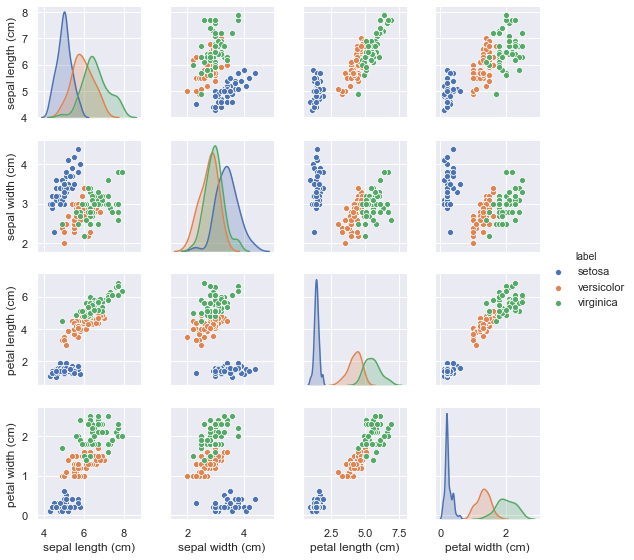

In [3]:
sns.set()
df = pd.DataFrame(iris.data, columns=iris['feature_names'] )
df['target'] = iris.target
df['label'] = df.apply(lambda x: iris['target_names'][int(x.target)], axis=1)
df.head()

sns.pairplot(df, hue='label', vars=iris['feature_names'], height=2);

# Classification
## Naive Bayes

In [4]:
from sklearn.naive_bayes import GaussianNB
# Classifieur
clf = GaussianNB()
# Apprentissage 
clf.fit(iris.data, iris.target) # On aurait aussi pu utiliser le dataframe df
result = clf.predict(iris.data)


In [5]:
errors = sum(result != iris.target) # 6 erreurs sur 150 mesures
print("Nb erreurs:", errors)
print( "Pourcentage de prédiction juste:", (150-errors)*100/150)   

Nb erreurs: 6
Pourcentage de prédiction juste: 96.0


In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(result, iris.target) 

0.96

In [7]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(iris.target, result)

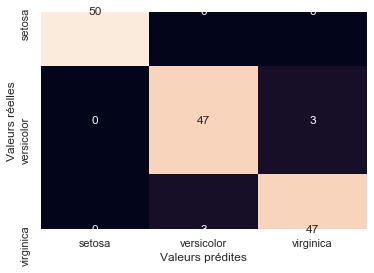

In [8]:
sns.heatmap(conf, square=True, annot=True, cbar=False,
             xticklabels=list(iris.target_names),
             yticklabels=list(iris.target_names))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

## Cartographie de l'apprentissage
On va générer des couples largeur x longeur de sépales, et visualiser le résultat. 

In [9]:
# On ne conserve que les longueurs/largeurs des sépales
data = iris.data[:, :2]
target = iris.target

#On réapprend
clf = GaussianNB()
clf.fit(data, target)
h = .15

# Nous recherchons les valeurs min/max de longueurs/largeurs des sépales
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

x = np.arange(x_min, x_max, h)
y = np.arange(y_min, y_max, h)

In [14]:
#La fonction meshgrid permet d'obtenir une grille de coordonnées
# pour les valeurs des points comprises entre x_min, x_max et y_min, y_max
xx, yy = np.meshgrid(x,y)

# http://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
# applatit les données du tableau
data_samples = list(zip(xx.ravel(), yy.ravel()) )

array([3.3 , 3.45, 3.6 , ..., 8.55, 8.7 , 8.85])

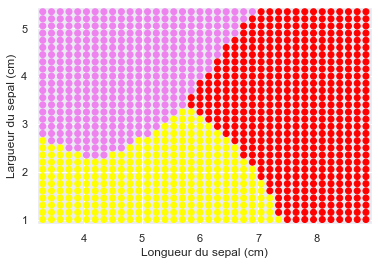

In [15]:
Z = clf.predict(data_samples)
#Z = Z.reshape(xx.shape)
plt.figure(1)
#plt.pcolormesh(xx, yy, Z) # Affiche les déductions en couleurs pour les couples x,y

# Plot also the training points
#plt.scatter(data[:, 0], data[:, 1], c=target)
colors = ['violet', 'yellow', 'red']
C = [colors[x] for x in Z]

plt.scatter(xx.ravel(), yy.ravel(), c=C)
plt.xlim(xx.min() - .1, xx.max() + .1)
plt.ylim(yy.min() - .1, yy.max() + .1)
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)');

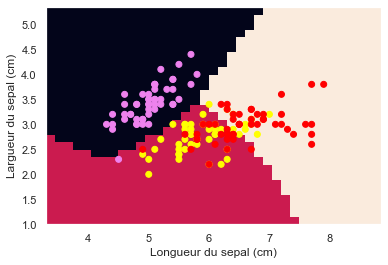

In [16]:
plt.figure(1)
plt.pcolormesh(xx, yy, Z.reshape(xx.shape)) # Affiche les déductions en couleurs pour les couples x,y
# Plot also the training points
colors = ['violet', 'yellow', 'red']
C = [colors[x] for x in target]
plt.scatter(data[:, 0], data[:, 1], c=C)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)');